In [1]:
from micrograd.vector import Tensor, MLP
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import torch

### Unit Test for MSS

In [2]:
n = 10
x = np.random.rand(n, 1)

t = Tensor(x)
mss = t.mss()
mss.grad = 1.0
mss._backward()

In [3]:
tr = torch.Tensor(x)
tr.requires_grad = True
mss_tr = torch.mean(torch.pow(tr, 2))
mss_tr.backward()

In [4]:
print('MSS %.4f, MSS_Tr %.4f' % (mss.data, mss_tr))
print('Difference in Grad %.4f' %
      np.linalg.norm(t.grad - tr.grad.numpy()))

MSS 0.3741, MSS_Tr 0.3741
Difference in Grad 0.0000


### Unit Test for __matmul__

In [5]:
n = 2
m = 10
x = np.random.rand(n, 1)
W = np.random.rand(m, n)

x_t = Tensor(x)
W_t = Tensor(W)
mss = (W_t @ x_t).mss()
mss.backward()

In [6]:
x_tr = torch.Tensor(x)
x_tr.requires_grad = True

W_tr = torch.Tensor(W)
W_tr.requires_grad = True

mss_tr = torch.mean(torch.pow(W_tr @ x_tr, 2))
mss_tr.backward()

In [7]:
print('MSS %.4f, MSS_Tr %.4f' % (mss.data, mss_tr))
print('Difference in Grad for x: %.4f' %
      np.linalg.norm(x_t.grad - x_tr.grad.numpy()))
print('Difference in Grad for W: %.4f' %
      np.linalg.norm(W_t.grad - W_tr.grad.numpy()))

MSS 0.3524, MSS_Tr 0.3524
Difference in Grad for x: 0.0000
Difference in Grad for W: 0.0000


### Build a simple MLP for binary classification

init model

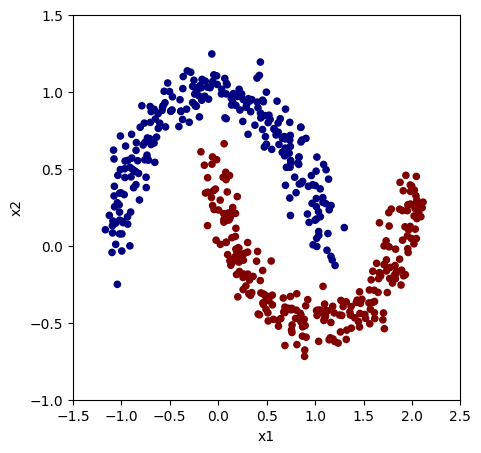

In [8]:
n_samples = 500
X, y = make_moons(n_samples=n_samples, noise=0.1)

y = y*2 - 1 # make y be -1 or 1

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.show()

In [9]:
# initialize model
model = MLP(n_in=2, n_hidden=10, n_out=1)

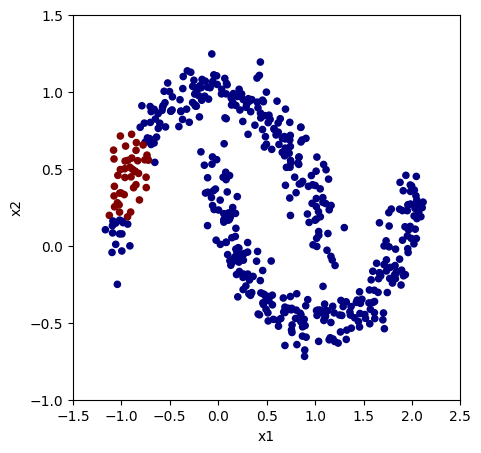

In [10]:
y_pred = model.predict(X)

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y_pred, s=20, cmap='jet')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.show()

training

In [11]:
margin = Tensor(np.array([1.0]).reshape(1, 1))
factor = Tensor(1 / np.array([n_samples]).reshape(1, 1))

In [12]:
n_epochs = 501
epoch_loss = []

for epoch in range(n_epochs):
    model.zero_grad()
    total_loss = 0.0

    # run through data
    for idx in range(X.shape[0]):
        x = Tensor(X[idx].reshape(2, 1))
        y_t = Tensor(-np.array([y[idx]]).reshape(1, 1))
        y_p = model.forward(x)

        loss = (margin + y_t * y_p).relu() * factor
        loss.backward()

        total_loss += loss.data

    lr = 0.1
    for p in model.params:
        p.data -= lr * p.grad

    epoch_loss.append(total_loss[0, 0])

    if epoch % 50 == 0:
        print('Epoch %d, Loss %.4f' % (epoch, total_loss[0, 0]))

Epoch 0, Loss 1.0649


In [ ]:
# after training
y_pred = model.predict(X)


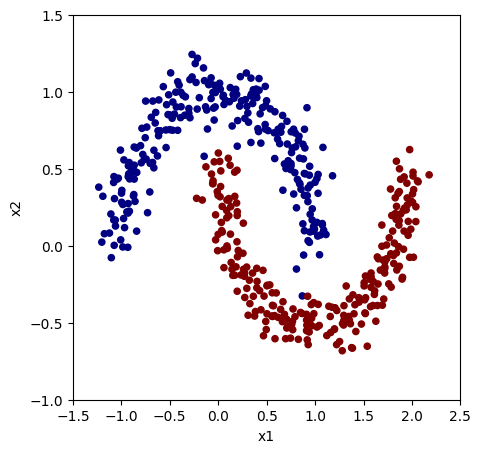

In [ ]:
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y_pred, s=20, cmap='jet')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.show()

Decision Boundary

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]

scores = model.predict(Xmesh)
Z = np.array([s > 0 for s in scores])
Z = Z.reshape(xx.shape)

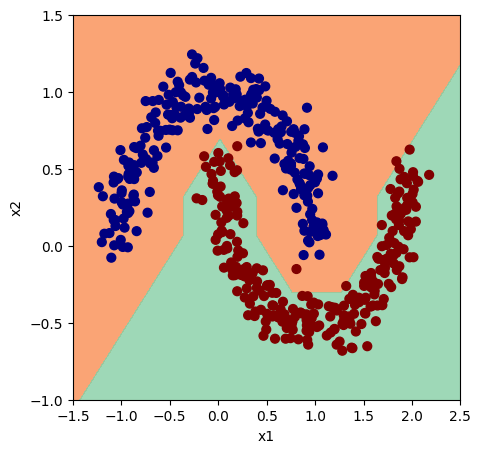

In [ ]:
fig = plt.figure(figsize=(5,5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='jet')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.show()